In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('Listings.csv',encoding="ISO-8859-1",low_memory=False)

In [3]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [5]:
df.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [6]:
df.shape

(279712, 33)

In [7]:
missing_values_count=df.isnull().sum()
missing_values_count

listing_id                          0
name                              173
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

<AxesSubplot:>

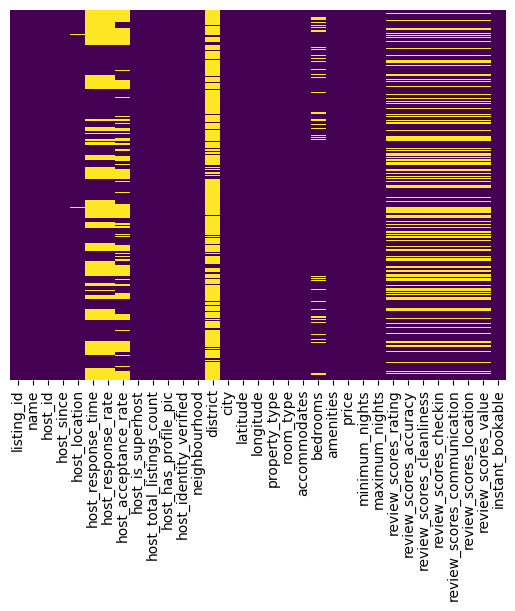

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.drop_duplicates()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
total_cells = np.product(df.shape)
total_missing = df.isnull().sum()

# percent of data that is missing
(total_missing/total_cells) * 100

listing_id                     0.000000
name                           0.001874
host_id                        0.000000
host_since                     0.001788
host_location                  0.009100
host_response_time             1.395180
host_response_rate             1.395180
host_acceptance_rate           1.225145
host_is_superhost              0.001788
host_total_listings_count      0.001788
host_has_profile_pic           0.001788
host_identity_verified         0.001788
neighbourhood                  0.000000
district                       2.629328
city                           0.000000
latitude                       0.000000
longitude                      0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bedrooms                       0.318889
amenities                      0.000000
price                          0.000000
minimum_nights                 0.000000
maximum_nights                 0.000000


In [11]:
numerical_columns = df.select_dtypes(include=np.number).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Step 2: Replace missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [12]:
print(df.head(15))

    listing_id                                               name   host_id  \
0       281420     Beautiful Flat in le Village Montmartre, Paris   1466919   
1      3705183                    39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2      4082273                Lovely apartment with Terrace, 60m2  19252768   
3      4797344                Cosy studio (close to Eiffel tower)  10668311   
4      4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   
5      4898654                 NEW - Charming apartment Le Marais    505535   
6      6021700                  2P - Entre Bastille et Republique   8053690   
7      6945740             57sqm btw. Bastille & PÃÂ¨re Lachaise   5924709   
8      7491966  Charming appartment near the Parc Buttes Chaumont  35812762   
9      7849932                  Bel appartement plein de charme !  20833291   
10     7995091          Beau 2piÃÂ¨ces prÃÂ¨s Butte aux cailles  35014275   
11     9011901                    Cosy appartement i

In [13]:
missing_values_count=df.isnull().sum()
missing_values_count

listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
district                       0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_sco

In [14]:
room_type_counts = df ['room_type'].value_counts()
print("Count of Various Room Types Available:")
print(room_type_counts)

Count of Various Room Types Available:
Entire place    182005
Private room     86988
Hotel room        5857
Shared room       4862
Name: room_type, dtype: int64


In [15]:
avg_price_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print("Average price per neighborhood:")
print(avg_price_neighborhood)

Average price per neighborhood:
neighbourhood
Sao Cristovao         8120.691358
Taling Chan           6332.152174
Ward 78               6240.000000
Ward 54               5847.412226
Ward 62               4924.851307
                         ...     
Port Richmond           48.666667
University Heights      48.125000
Soundview               47.538462
Vila Kosmos             39.000000
Gerritsen Beach         30.000000
Name: price, Length: 660, dtype: float64


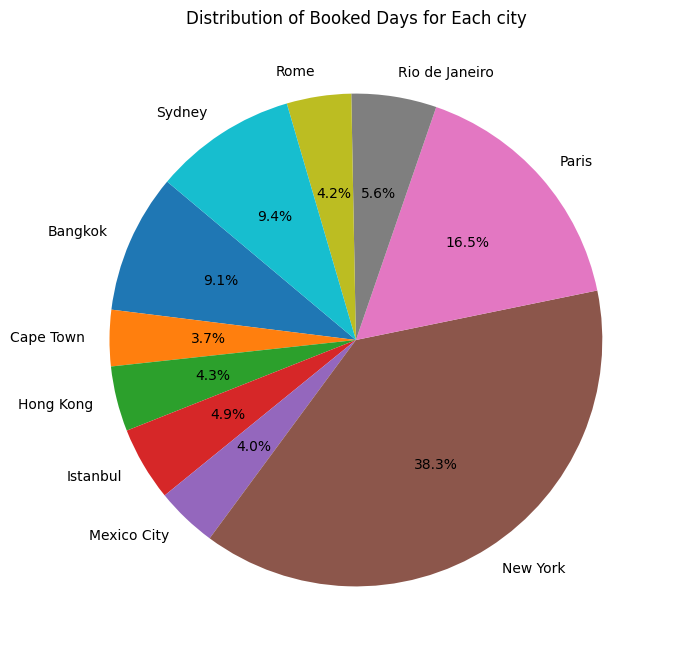

In [16]:
# Create a pie chart showing the distribution of booked days for each city
booking_days = df.groupby('city')['minimum_nights'].sum()
plt.figure(figsize=(8, 8))
pie_chart = booking_days.plot(kind='pie', autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Distribution of Booked Days for Each city')
plt.ylabel('')
plt.show()

In [17]:
df["host_since"]=pd.to_datetime(df["host_since"])
df["host_since"]

0        2011-12-03
1        2013-11-29
2        2014-07-31
3        2013-12-17
4        2014-12-14
            ...    
279707   2015-04-13
279708   2013-11-27
279709   2012-04-27
279710   2015-07-16
279711   2013-06-17
Name: host_since, Length: 279712, dtype: datetime64[ns]

In [18]:
paris_listings=(df.query("city== 'Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]])
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64690 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [19]:
paris_listings_neighbourhood= (paris_listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price"))
paris_listings_neighbourhood.tail(10)

,price
neighbourhood,
Opera,119.038644
Pantheon,122.662150
Temple,138.446823
Hotel-de-Ville,144.472110
Bourse,149.496801
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972


In [20]:
paris_listings_neighbourhood.head(10)

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [21]:
paris_listings_accommodate=(paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price"))
paris_listings_accommodate

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [22]:
paris_listings_accommodate1=(paris_listings.query("neighbourhood == 'Menilmontant'").groupby("accommodates").agg({"price":"mean"}).sort_values("price"))
paris_listings_accommodate1

,price
accommodates,
0,0.000000
1,47.699074
2,61.568242
3,70.097800
4,84.340278
5,113.542169
6,131.807692
15,147.000000
7,180.529412


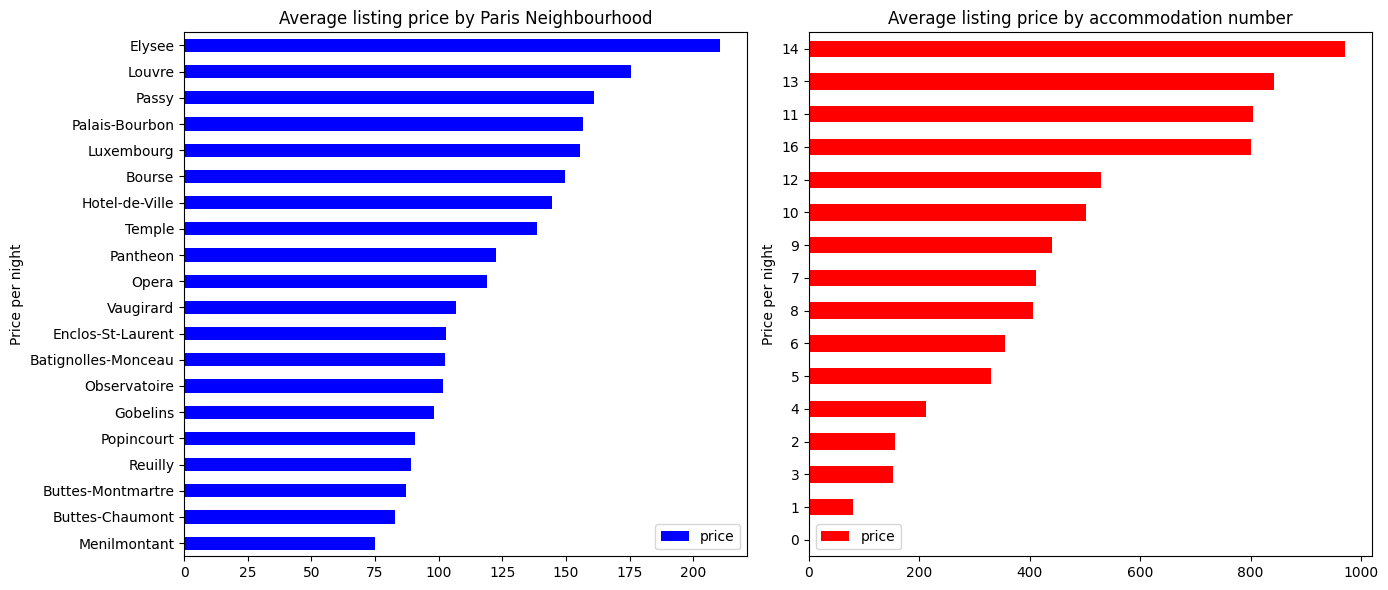

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for average listing price by Paris Neighbourhood
paris_listings_neighbourhood.plot.barh(ax=axes[0], title="Average listing price by Paris Neighbourhood",
                                       xlabel="Price per night", ylabel="Neighbourhood", color="blue")

# Plot for average listing price by accommodation number
paris_listings_accommodate.plot.barh(ax=axes[1], title="Average listing price by accommodation number",
                                     xlabel="Price per night", ylabel="Accommodation Capacity", color="red")

plt.tight_layout()
plt.show()


In [24]:
paris_listings_overtime=(paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood":"count","price":"mean"}))
paris_listings_overtime


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


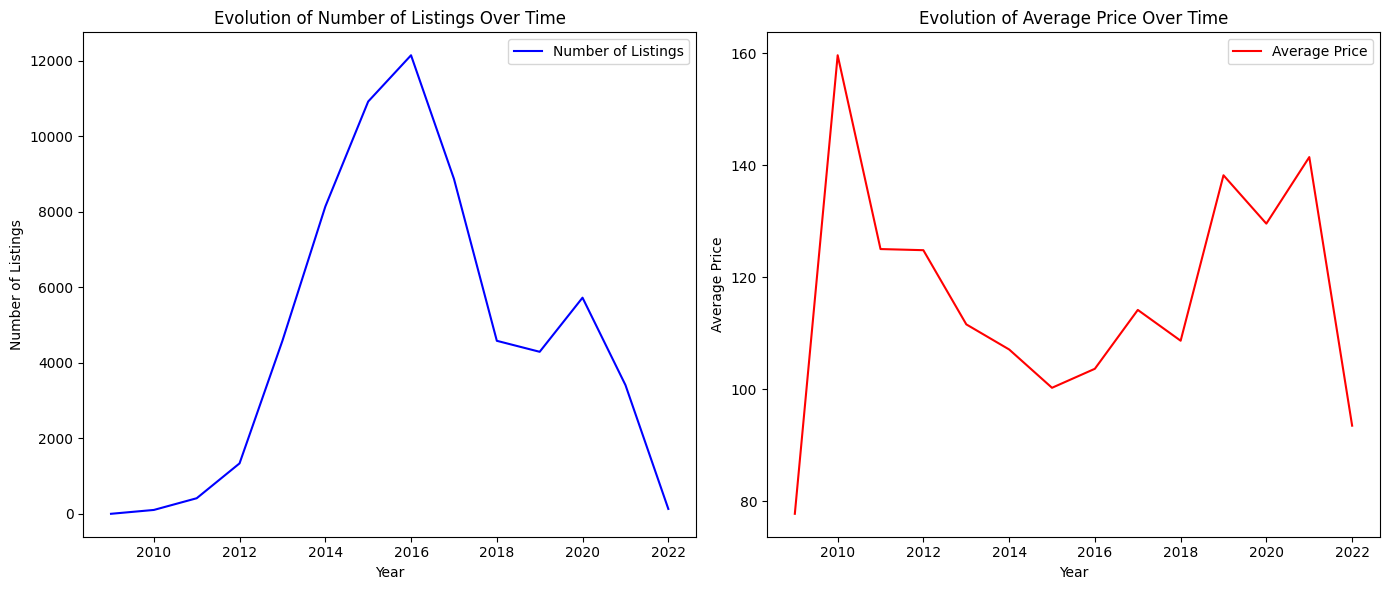

In [25]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the evolution of the number of listings over time
ax[0].plot(paris_listings_overtime.index, paris_listings_overtime['neighbourhood'], label='Number of Listings', color='blue')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Listings')
ax[0].set_title('Evolution of Number of Listings Over Time')
ax[0].legend()

# Plotting the evolution of the average price over time
ax[1].plot(paris_listings_overtime.index, paris_listings_overtime['price'], label='Average Price', color='red')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Price')
ax[1].set_title('Evolution of Average Price Over Time')
ax[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


Text(0.5, 1.0, '2015 regulations led to fewer new hosts and higher prices')

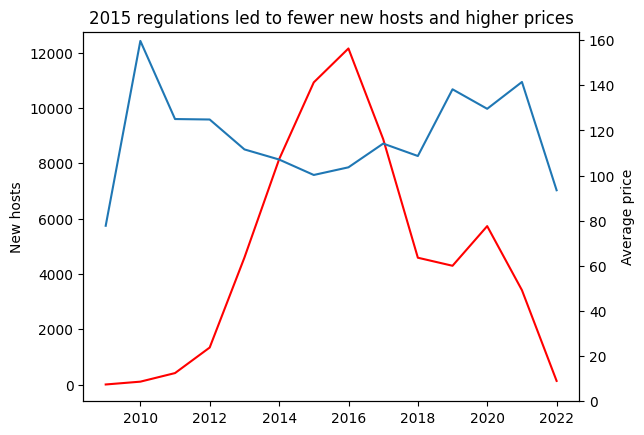

In [26]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(paris_listings_overtime.index,paris_listings_overtime["neighbourhood"],label="New hosts",color="red")
ax.set_ylabel("New hosts")
ax2=ax.twinx()
ax2.plot(paris_listings_overtime.index,paris_listings_overtime["price"],label="Average price")
ax2.set_ylabel("Average price")
ax2.set_ylim(0)
ax.set_title("2015 regulations led to fewer new hosts and higher prices")

In [27]:
mean_price_by_neighbourhood = df.groupby("neighbourhood")["price"].mean().sort_values(ascending = False).round(2)

# Print object type, shape, and head
print("mean_price_by_neighbourhood type:", type(mean_price_by_neighbourhood))
print("mean_price_by_neighbourhood shape:", mean_price_by_neighbourhood.shape)
mean_price_by_neighbourhood_10 = mean_price_by_neighbourhood.head(10)

mean_price_by_neighbourhood type: <class 'pandas.core.series.Series'>
mean_price_by_neighbourhood shape: (660,)


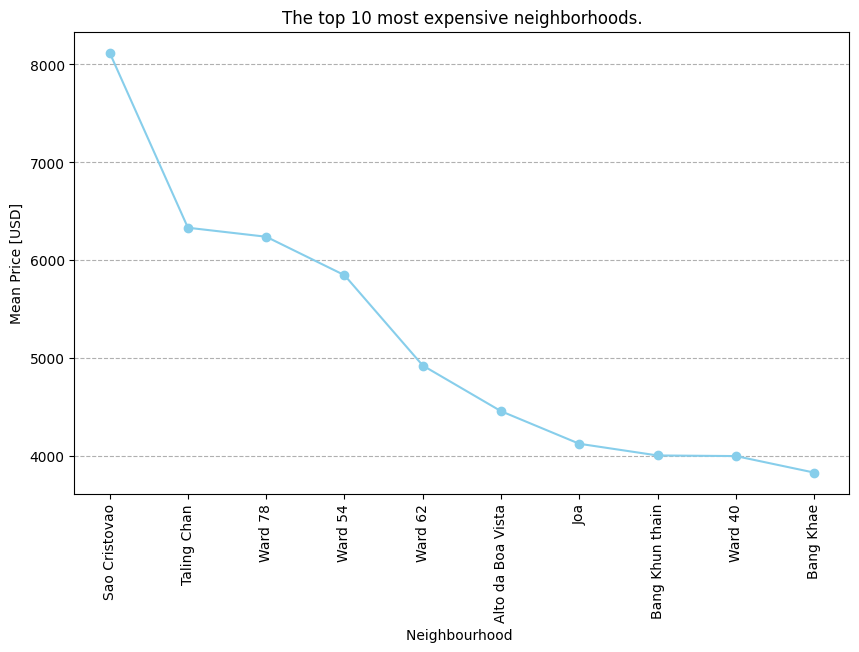

In [28]:
# The top 10 most expensive neighborhoods.
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_neighbourhood_10, 'o-', color='skyblue')
plt.xlabel('Neighbourhood ')
plt.ylabel('Mean Price [USD]')
plt.title('The top 10 most expensive neighborhoods.')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.show()


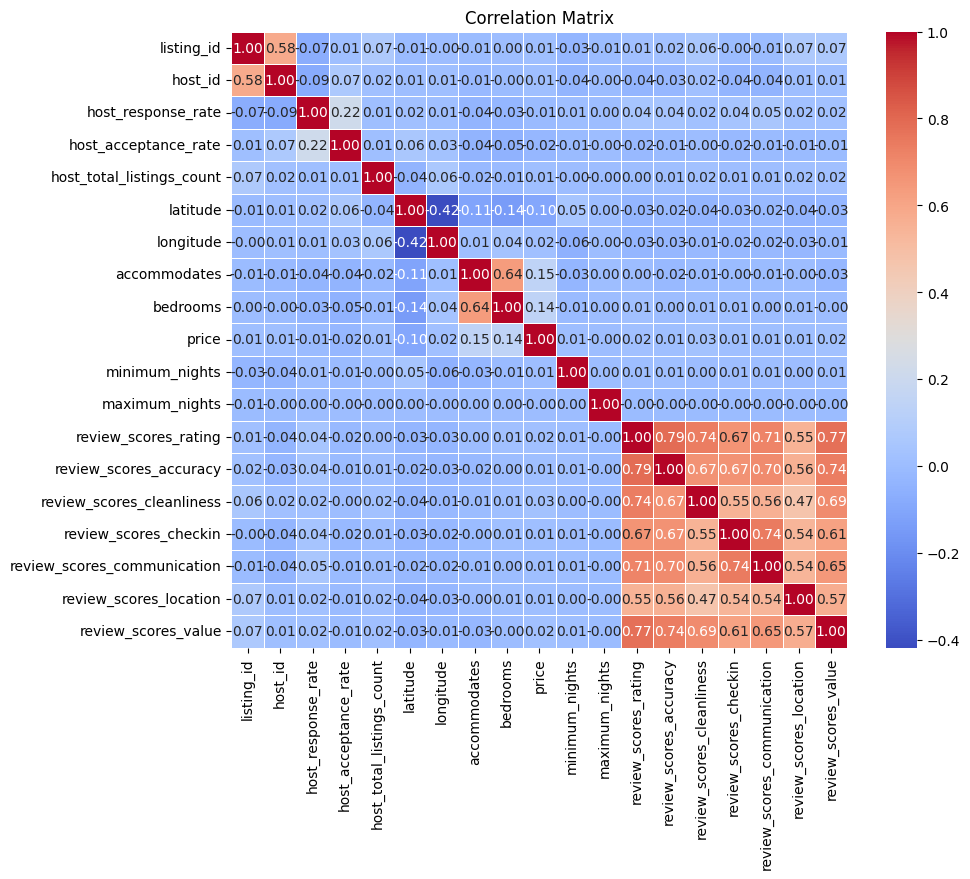

In [29]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, square=True, fmt=".2f",
            yticklabels=corr_matrix.columns, xticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()